#  Work Place Satisfaction Survey – Final Data Analysis Project

**Group:** 10 
**Members:** 1. Md Maruf
             2. Muntasir Islam
             3. Sakshi Sakshi
             4. Md Firoz Chowdhury  
**Dataset:** WorkPlaceSatisfactionSurveyData.xlsx  
**Objective:** Analyze workplace satisfaction survey data and demonstrate application of Python programming, data cleaning, descriptive statistics, EDA, and statistical testing.

# Analyzing Workplace Satisfaction Survey Data

This notebook presents an in-depth analysis of **Workplace Satisfaction Survey Data**.  
The dataset contains information about employees’ **demographics** (such as gender, age, education, and family status), as well as their **satisfaction levels** with management, colleagues, work environment, salary, and tasks.

The goal of this project is to apply Python data analysis techniques — including **data cleaning**, **descriptive statistics**, **visualization**, and **hypothesis testing** — to uncover patterns and insights related to workplace satisfaction.

---

## Goals of the Analysis
1. Understand the demographics and satisfaction levels of employees.  
2. Visualize distributions and relationships among key variables.  
3. Test whether there are significant differences or relationships between variables (e.g., gender and salary).  
4. Provide meaningful insights that could help improve workplace conditions and employee satisfaction.


## Import Required Libraries

In [22]:
# Import required libraries for analyzing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





## 1. Load & Inspecting the Dataset

### 1.1 Loading the Dataset

In this step, we import the **Workplace Satisfaction Survey** dataset using the `pandas` library.  
This dataset contains employee information such as gender, age, education, years of service, and various satisfaction ratings.  
Loading the data allows us to begin exploring its structure and preparing it for analysis.


In [23]:
# Load Dataset
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

### 1.2 Inspecting the Dataset

In this step, we take a closer look at the dataset to understand its structure and contents.  
- `df.head()` displays the first few rows to preview the data.  
- `df.info()` shows column names, data types, and missing values.  
- `df.describe()` provides summary statistics for numerical columns.  
- `df.columns` lists all column names for reference.  
This helps us verify that the dataset has loaded correctly and identify any potential issues before analysis.


In [24]:
# Inspect Data
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   number  gender  age  family  education  years_of_service  salary  \
0       1       1   38       1        1.0              22.0    3587   
1       2       1   29       2        2.0              10.0    2963   
2       3       1   30       1        1.0               7.0    1989   
3       4       1   36       2        1.0              14.0    2144   
4       5       1   24       1        2.0               4.0    2183   

   sat_management  sat_colleques  sat_workingEnvironment  sat_salary  \
0               3            3.0                       3           3   
1               1            5.0                       2           1   
2               3            4.0                       1           1   
3               3            3.0                       3           3   
4               2            3.0                       2           1   

   sat_tasks  healtcare  holidayCabin  gym  muscleCare  
0          3        NaN           NaN  NaN         NaN  
1          3        NaN   

## 2. Data Cleaning

### 2.1 Check for Missing Values

Before any analysis, it’s important to check for missing data that could affect results.  
We use `isnull().sum()` to count missing values in each column.



In [25]:
# Check missing values
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

### 2.2 Adjust Column Names

We rename the columns to make them shorter and easier to reference in our analysis.  
This step improves readability and consistency when working with the dataset.


In [26]:
df.columns = [
    'ID', 'Gender', 'Age', 'FamilyStatus', 'Education', 'YearsOfService',
    'Salary', 'SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary',
    'SatTasks', 'HealthCare', 'HolidayCabin', 'Gym', 'MuscleCare'
]

In [27]:
df.head()

,ID,Gender,Age,FamilyStatus,Education,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks,HealthCare,HolidayCabin,Gym,MuscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


###  2.3 Drop unnecessary columns
We drop the unnecessary columns to minimize confusion

In [28]:
# Drop unnecessary columns (like 'ID')
df = df.drop(['ID'], axis=1)

In [29]:
df.head()

,Gender,Age,FamilyStatus,Education,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks,HealthCare,HolidayCabin,Gym,MuscleCare
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


### 2.4 Summary Statistics
In this step, we use different commands to get a quick summary of our dataset.  
These summaries help us understand the **size**, **data types**, and **basic numeric properties** (like mean, minimum, and maximum values).

- `info()` → shows column names, data types, and missing values.  
- `describe()` → gives statistical summary (mean, median, std, etc.) for numeric columns.  
- `count()` → shows how many non-missing values each column has.  
- `nlargest()` → helps us find the rows with the highest values for a certain column (e.g., top 5 highest salaries).

In [30]:
# Show dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          82 non-null     int64  
 1   Age             82 non-null     int64  
 2   FamilyStatus    82 non-null     int64  
 3   Education       81 non-null     float64
 4   YearsOfService  80 non-null     float64
 5   Salary          82 non-null     int64  
 6   SatManagement   82 non-null     int64  
 7   SatColleagues   81 non-null     float64
 8   SatWorkEnv      82 non-null     int64  
 9   SatSalary       82 non-null     int64  
 10  SatTasks        82 non-null     int64  
 11  HealthCare      47 non-null     float64
 12  HolidayCabin    20 non-null     float64
 13  Gym             9 non-null      float64
 14  MuscleCare      22 non-null     float64
dtypes: float64(7), int64(8)
memory usage: 9.7 KB


In [31]:
# Show summary statistics for numerical variables
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,Gender,Age,FamilyStatus,Education,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks,HealthCare,HolidayCabin,Gym,MuscleCare
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [32]:
# Count non-missing values in each column
print("\n Non-missing value count:")
print(df.count())


 Non-missing value count:
Gender            82
Age               82
FamilyStatus      82
Education         81
YearsOfService    80
Salary            82
SatManagement     82
SatColleagues     81
SatWorkEnv        82
SatSalary         82
SatTasks          82
HealthCare        47
HolidayCabin      20
Gym                9
MuscleCare        22
dtype: int64


In [33]:
# Show top 5 rows with the highest salaries
print("\n Top 5 highest salaries:")
display(df.nlargest(5, 'Salary'))


 Top 5 highest salaries:


,Gender,Age,FamilyStatus,Education,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks,HealthCare,HolidayCabin,Gym,MuscleCare
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4,NaN,1.0,NaN,NaN
16,1,26,1,4.0,2.0,5225,5,5.0,5,4,5,NaN,NaN,1.0,NaN
66,1,37,2,4.0,8.0,5069,3,4.0,3,2,2,1.0,1.0,NaN,1.0
21,1,47,2,3.0,17.0,4874,2,4.0,3,2,4,NaN,1.0,NaN,NaN
23,1,36,1,3.0,7.0,4446,3,4.0,3,4,5,NaN,NaN,NaN,NaN


### 2.5 Grouping and Aggregation Analysis

In this section, we perform **grouping and aggregation** as part of the Exploratory Data Analysis (EDA).  
The goal is to summarize and compare employee satisfaction levels across different demographic and organizational groups.

#### Objectives:
- Understand how satisfaction varies by **Gender**, **Education**, and **Family Status**.
- Explore how **Years of Service** influence satisfaction and work-related perceptions.
- Identify potential patterns or inequalities among different employee groups.


**Average Satisfaction by Gender**  
   - Compares mean satisfaction scores (Management, Colleagues, Work Environment, Salary, Tasks) between male and female employees.

In [34]:
# Average satisfaction by Gender
group_gender = df.groupby('Gender')[['SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary', 'SatTasks']].mean()
print("Average Satisfaction by Gender:")
display(group_gender)

Average Satisfaction by Gender:


,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks
Gender,,,,,
1,2.873016,4.129032,3.000000,1.904762,3.095238
2,3.684211,3.842105,3.947368,2.789474,3.526316


**Average Satisfaction by Education Level**  
   - Shows whether education background affects overall satisfaction.

In [35]:
# Average satisfaction by Education level
group_education = df.groupby('Education')[['SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary', 'SatTasks']].mean()
print("\nAverage Satisfaction by Education:")
display(group_education)


Average Satisfaction by Education:


,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks
Education,,,,,
1.0,2.962963,4.037037,2.851852,1.814815,3.037037
2.0,2.933333,4.172414,3.166667,2.033333,3.166667
3.0,3.227273,3.909091,3.681818,2.454545,3.454545
4.0,4.000000,4.500000,4.000000,3.000000,3.500000


**Average Salary and Satisfaction by Family Status**  
   - Examines how family circumstances may relate to salary level and satisfaction at work.

In [36]:
# Average salary and satisfaction by Family Status
group_family = df.groupby('FamilyStatus')[['Salary', 'SatManagement', 'SatWorkEnv']].mean()
print("\nAverage Salary and Satisfaction by Family Status:")
display(group_family)


Average Salary and Satisfaction by Family Status:


,Salary,SatManagement,SatWorkEnv
FamilyStatus,,,
1,2304.193548,2.774194,2.806452
2,2721.725490,3.235294,3.470588


**Satisfaction Trend by Years of Service**  
   - Groups employees into service duration bins (0–5, 6–10, 11–15, 16–20, 21+ years).  
   - Analyzes how satisfaction towards salary, tasks, and work environment changes with experience.

In [37]:
# Satisfaction trend by Years of Service (binned)
df['ServiceGroup'] = pd.cut(df['YearsOfService'], bins=[0,5,10,15,20,30], labels=['0-5','6-10','11-15','16-20','21+'])
group_service = df.groupby('ServiceGroup', observed=True)[['SatSalary', 'SatTasks', 'SatWorkEnv']].mean()
print("\nAverage Satisfaction by Years of Service:")
display(group_service)


Average Satisfaction by Years of Service:


,SatSalary,SatTasks,SatWorkEnv
ServiceGroup,,,
0-5,2.000000,2.944444,3.055556
6-10,2.125000,3.375000,3.062500
11-15,2.545455,3.272727,3.363636
16-20,2.200000,3.266667,3.600000
21+,2.000000,3.142857,3.428571


### 2.6 Explore Unique Values of Each Variable

Here we loop through all columns to see the **unique values** that each variable contains.  
This helps us understand how categorical variables (like `Gender`, `Education`, etc.) are coded in the dataset.Here we explore only first 10 unique values.


In [38]:
# Loop through each variable and print unique values
for var in df.columns:
    print(f"{var}: {df[var].unique()[:10]}") 


Gender: [1 2]
Age: [38 29 30 36 24 31 49 55 40 33]
FamilyStatus: [1 2]
Education: [ 1.  2.  3.  4. nan]
YearsOfService: [22. 10.  7. 14.  4. 16.  0. 23. 21. 15.]
Salary: [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651]
SatManagement: [3 1 2 4 5]
SatColleagues: [ 3.  5.  4.  2. nan]
SatWorkEnv: [3 2 1 5 4]
SatSalary: [3 1 2 4 5]
SatTasks: [3 2 4 1 5]
HealthCare: [nan  1.]
HolidayCabin: [nan  1.]
Gym: [nan  1.]
MuscleCare: [nan  1.]
ServiceGroup: ['21+', '6-10', '11-15', '0-5', '16-20', NaN]
Categories (5, object): ['0-5' < '6-10' < '11-15' < '16-20' < '21+']


### 2.7 Handling Missing Values Before Cleaning

Instead of removing rows with missing data, we first fill them with reasonable default values.  
- For numeric variables like `Education` and `YearsOfService`, we replace missing values with the **median**.  
- For binary/benefit variables like `HealthCare`, `HolidayCabin`, `Gym`, and `MuscleCare`, we replace missing values with **0** (meaning the benefit was not used or not available).  
This helps us keep as much data as possible before cleaning.


In [39]:
# Check missing values before filling
print(" Missing values before filling:")
print(df.isnull().sum())


 Missing values before filling:
Gender             0
Age                0
FamilyStatus       0
Education          1
YearsOfService     2
Salary             0
SatManagement      0
SatColleagues      1
SatWorkEnv         0
SatSalary          0
SatTasks           0
HealthCare        35
HolidayCabin      62
Gym               73
MuscleCare        60
ServiceGroup       8
dtype: int64


In [40]:
# Fill missing numeric columns
df['Education'] = df['Education'].fillna(df['Education'].median())
df['YearsOfService'] = df['YearsOfService'].fillna(df['YearsOfService'].median())

In [41]:
# Fill missing benefit columns with 0
df = df.fillna({
    'HealthCare': 0,
    'HolidayCabin': 0,
    'Gym': 0,
    'MuscleCare': 0
})

In [42]:
# Check that everything is filled
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Gender            0
Age               0
FamilyStatus      0
Education         0
YearsOfService    0
Salary            0
SatManagement     0
SatColleagues     1
SatWorkEnv        0
SatSalary         0
SatTasks          0
HealthCare        0
HolidayCabin      0
Gym               0
MuscleCare        0
ServiceGroup      8
dtype: int64


### 2.8 Clean the Data

After filling in missing values, we check for and remove any **duplicate rows** in the dataset.  
Duplicate rows can appear when the same data is entered more than once, which may affect the accuracy of our analysis.  

We use `drop_duplicates()` to remove these extra copies, keeping only unique records.  
Finally, we print the **shape of the dataset** to confirm how many rows and columns remain after cleaning.

In [43]:
# Drop duplicates if any
df = df.drop_duplicates()

In [44]:
# Check dataset shape after cleaning
df.shape

(82, 16)

## 3. Examine Variable Distributions 

In this step, we analyze each variable in the dataset individually to understand its distribution.  
We identify whether each variable is **categorical (qualitative)** or **numerical (quantitative)** and then use appropriate visualization techniques to represent them.

This helps us understand:
- The range and spread of numerical values.
- The frequency of each category in categorical variables.
- Any possible data imbalance or outliers.


###  3.1 Identify Variable Types

We start by separating variables into **categorical** and **numerical** types.  
This helps us decide which type of visualization (bar chart or histogram) is appropriate for each variable.


In [45]:
# Identify categorical and numerical columns
categorical_vars = ['Gender', 'FamilyStatus', 'Education', 'HealthCare', 'HolidayCabin', 'Gym', 'MuscleCare']
numerical_vars = ['Age', 'YearsOfService', 'Salary', 'SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary', 'SatTasks']

In [46]:
print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Gender', 'FamilyStatus', 'Education', 'HealthCare', 'HolidayCabin', 'Gym', 'MuscleCare']
Numerical Variables: ['Age', 'YearsOfService', 'Salary', 'SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary', 'SatTasks']


### 3.2 Analyze and Summarize Numerical Variables

We review summary statistics such as **mean**, **standard deviation**, **minimum**, and **maximum** values using `describe()`.  
This gives us a quick idea of the central tendency and spread of each numerical variable.


In [47]:
# Summary statistics for numerical variables
print(" Summary Statistics for Numerical Variables:")
display(df[numerical_vars].describe())


 Summary Statistics for Numerical Variables:


,Age,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks
count,82.000000,82.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,37.951220,12.182927,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,9.773866,8.697776,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,20.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,31.000000,4.250000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,37.500000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,44.000000,18.000000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,61.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 3.3 Visualize Categorical Variables

For **categorical variables**, we use **bar charts** to show how frequently each category appears in the dataset.


#### Gender distribution among employees

In [48]:
df2 = pd.crosstab(df['Gender'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum()
df2.columns.name = ''
df2

,Count,%
Gender,,
1,63,0.768293
2,19,0.231707


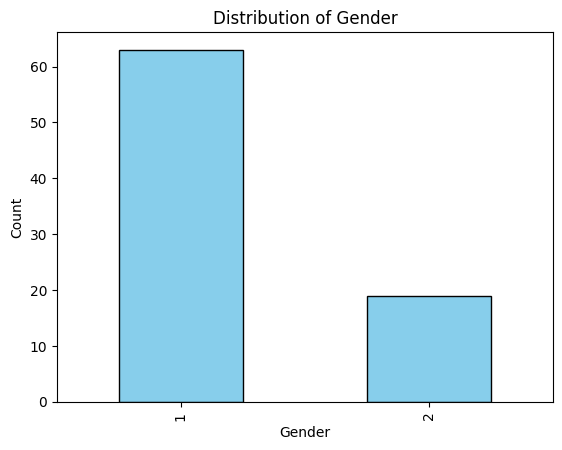

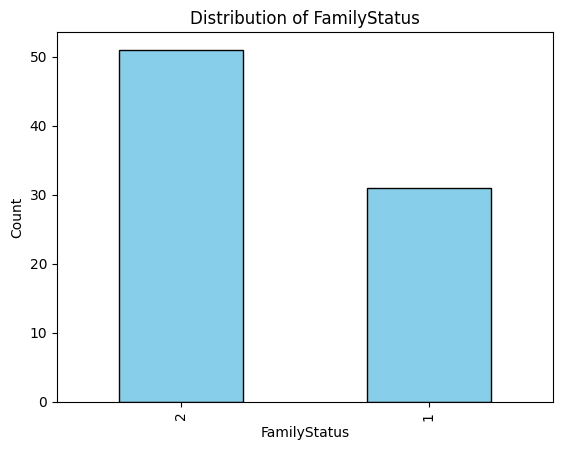

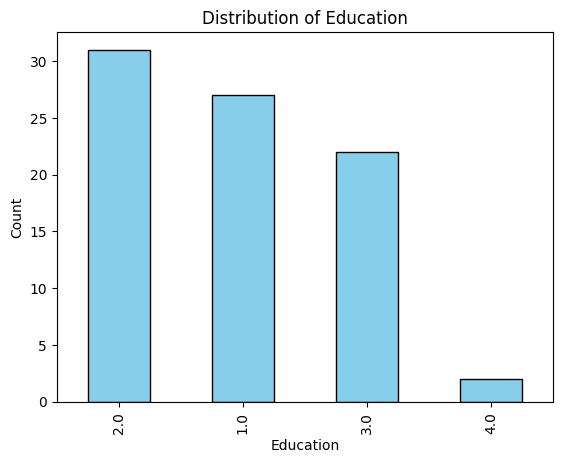

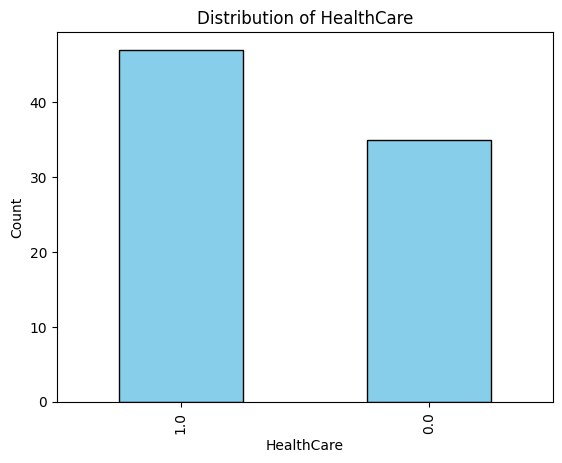

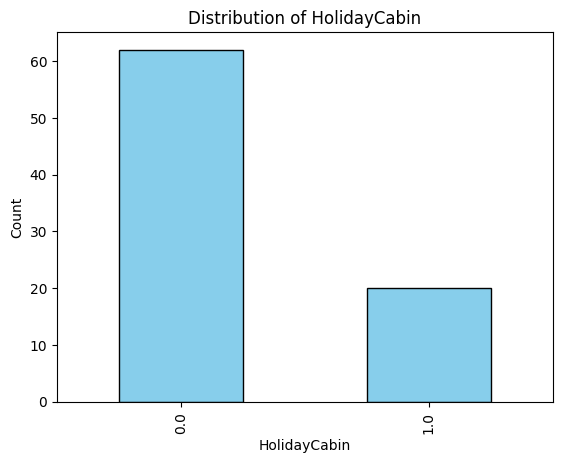

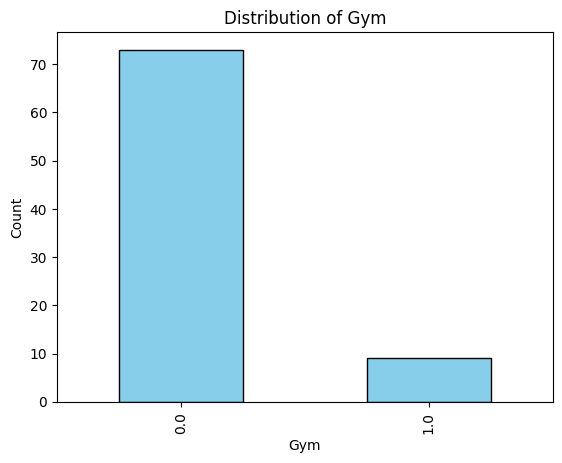

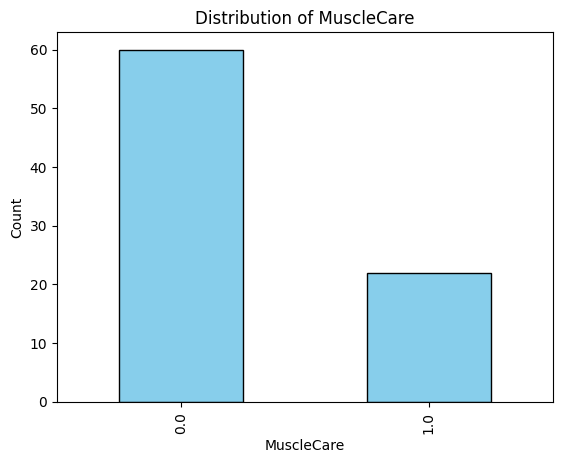

In [49]:
import matplotlib.pyplot as plt

# Plot bar charts for categorical variables
for col in categorical_vars:
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### 3.4 Visualizing Numerical Variables

In this step, we analyze and visualize the **numerical (quantitative) variables** from the Workplace Satisfaction dataset.  

Visualizations help us:
- Understand how the data is distributed.  
- Detect patterns or outliers.  
- Compare relationships between variables.  

We will use several types of charts as instructed:
- **Histograms**  
- **Boxplots**  
- **Line plots**  
- **Area charts**  
- **Pie charts**  
- **Scatter plots**



###  **Histograms** — View Data Distribution

Histograms show how numerical values are distributed, helping us see **frequency patterns**, **skewness**, and **spread** of data.


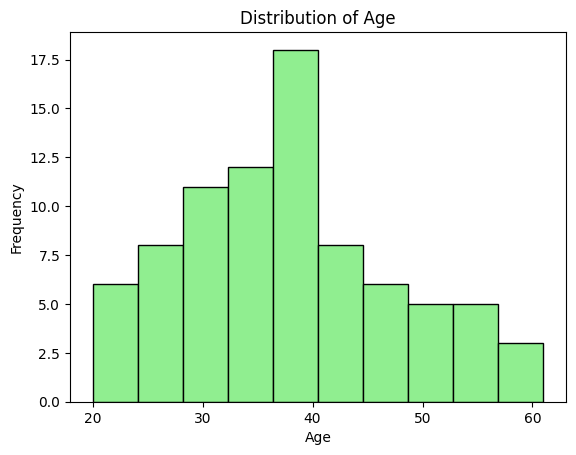

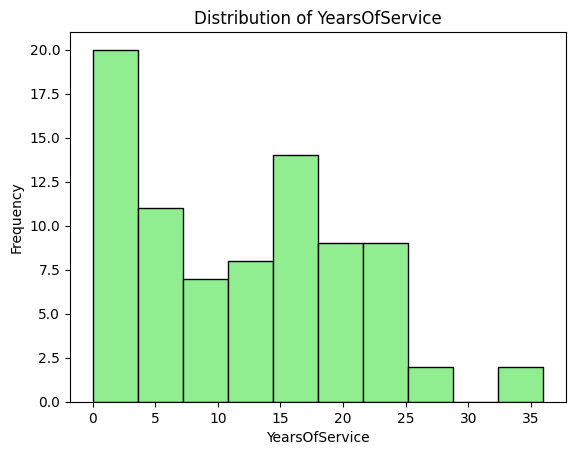

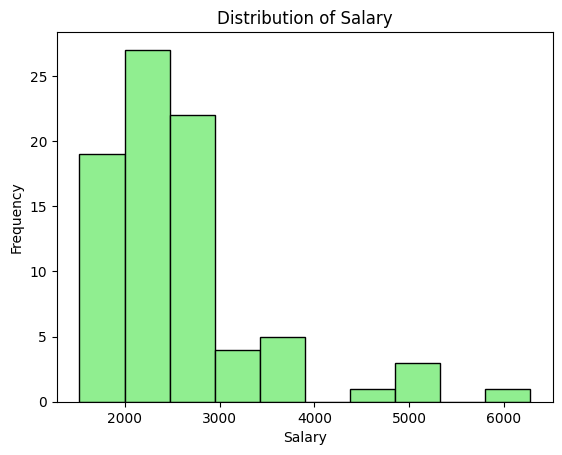

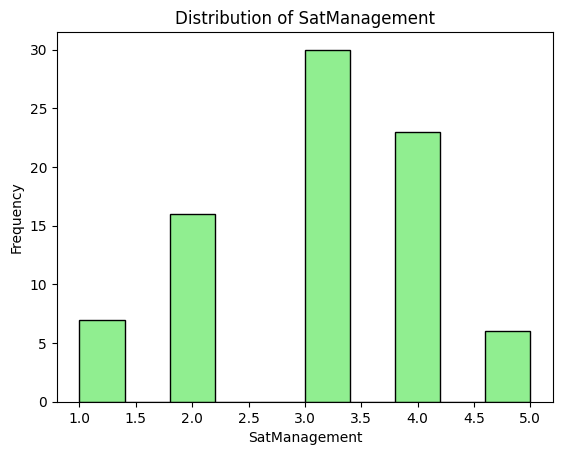

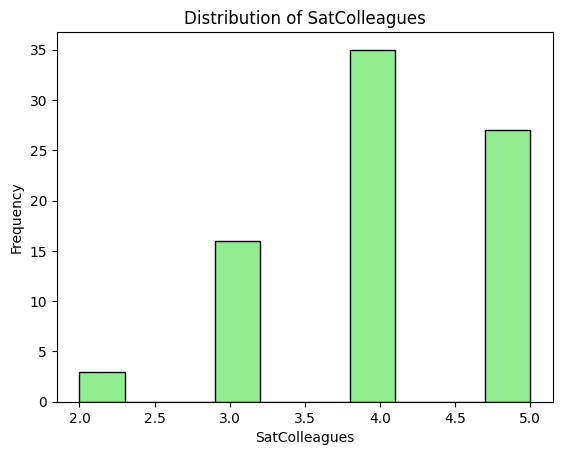

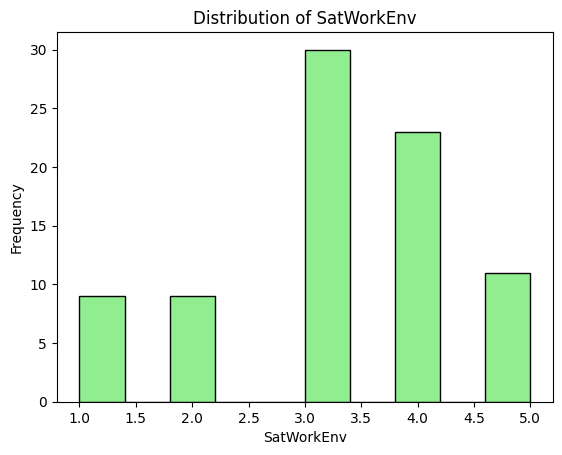

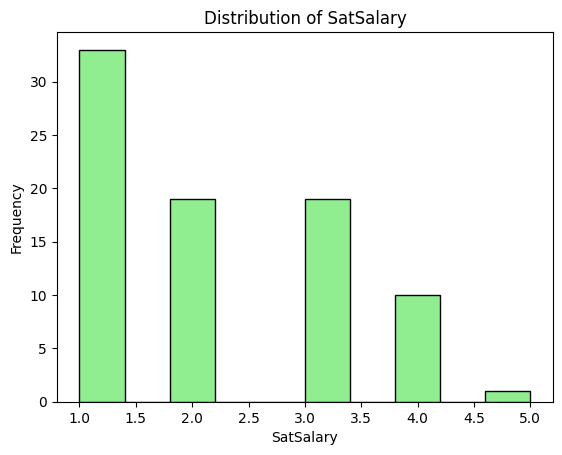

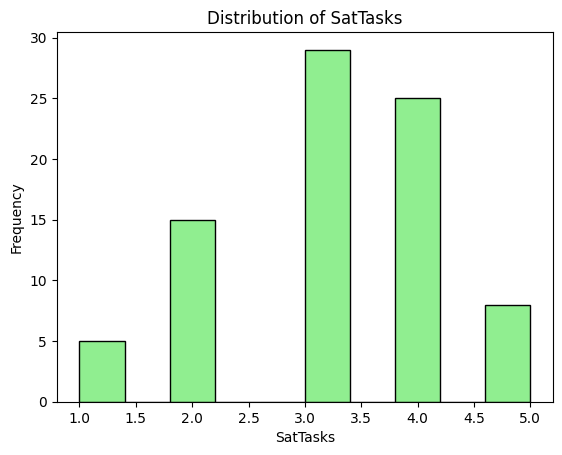

In [50]:
# Plot histograms for numerical variables
for col in numerical_vars:
    df[col].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



### **Boxplots** — Identify Outliers and Spread

Boxplots help detect **outliers** and show the **median**, **quartiles**, and **data spread** for each numerical variable.



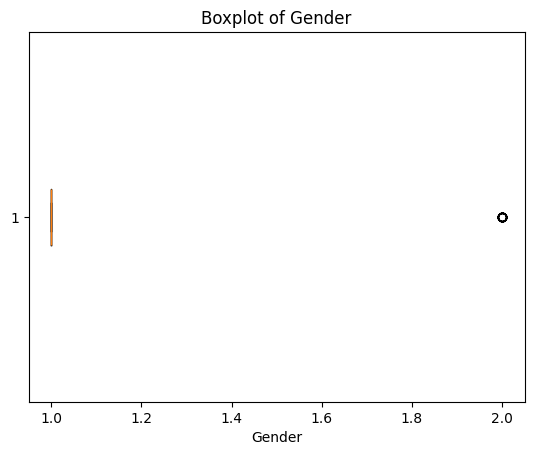

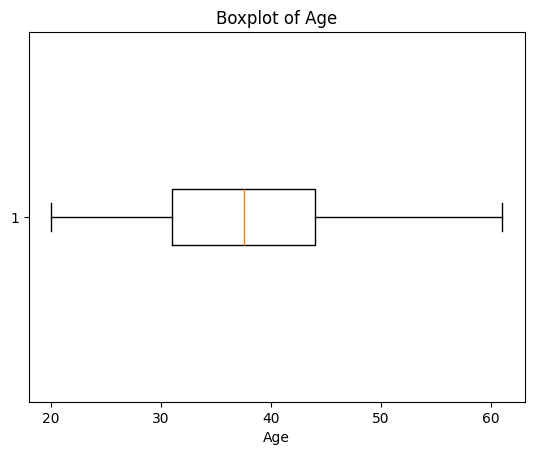

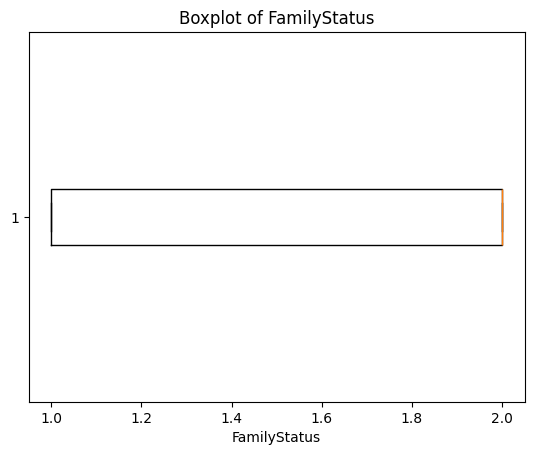

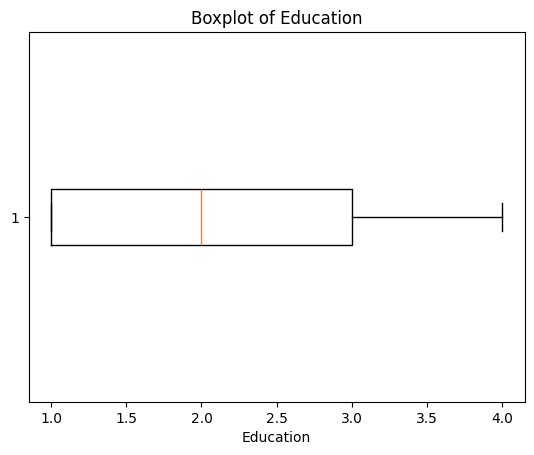

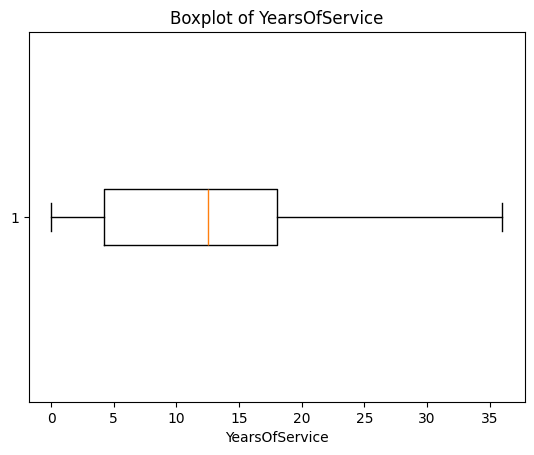

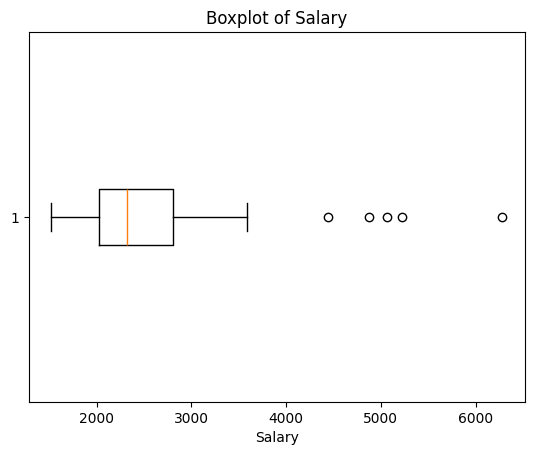

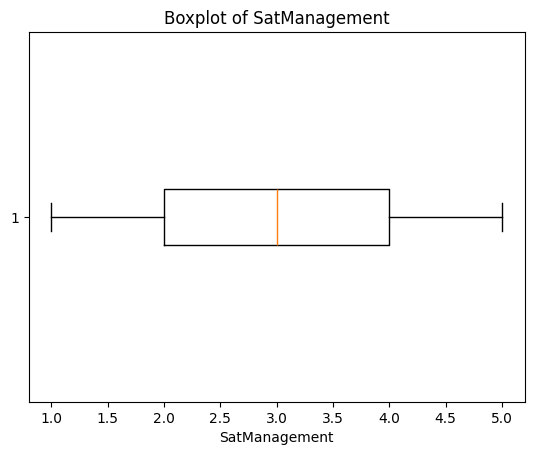

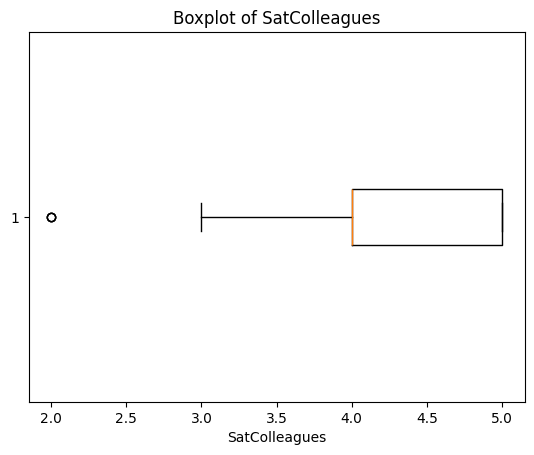

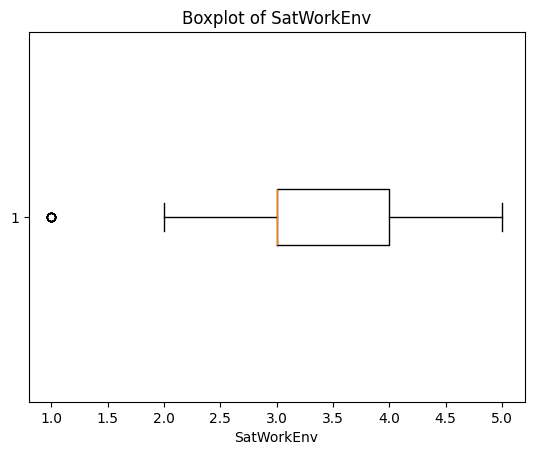

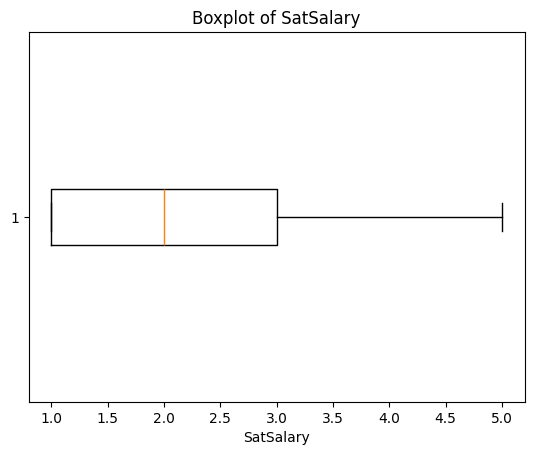

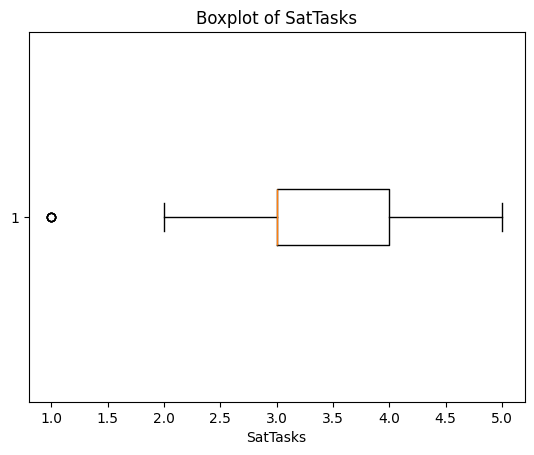

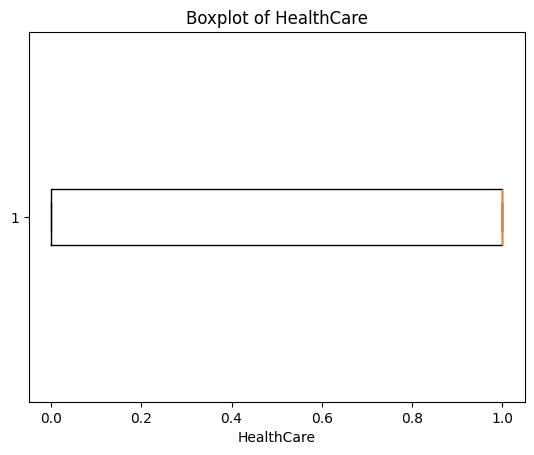

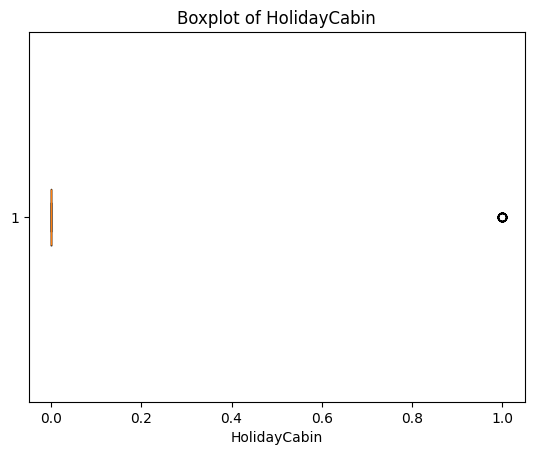

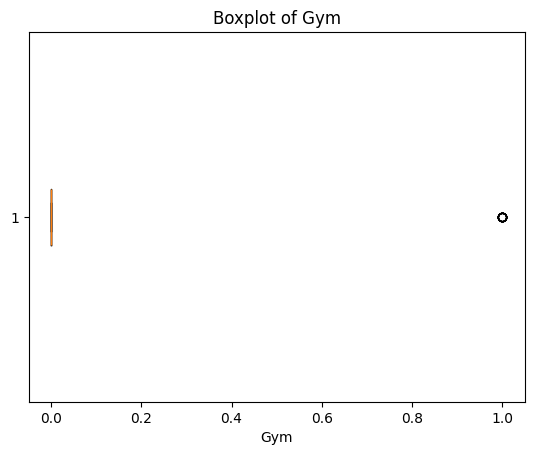

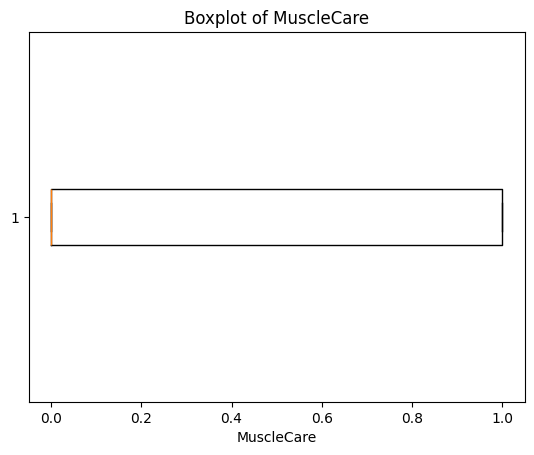

In [51]:
# Identify all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
# Plot boxplots for numerical variables
for col in numeric_columns:
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


### **Line Plots** — Observe Trends Across Observations

Line plots show **patterns and trends** in satisfaction ratings across respondents.


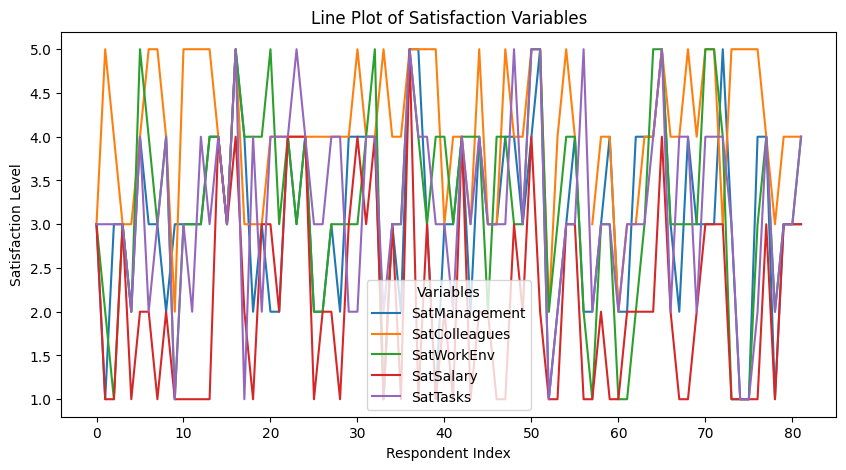

In [52]:
# Line plots to show patterns & trends
satisfaction_cols = ['SatManagement', 'SatColleagues', 'SatWorkEnv', 'SatSalary', 'SatTasks']

df[satisfaction_cols].reset_index(drop=True).plot(kind='line', figsize=(10, 5))
plt.title('Line Plot of Satisfaction Variables')
plt.xlabel('Respondent Index')
plt.ylabel('Satisfaction Level')
plt.legend(title='Variables')
plt.show()


### **Area Charts** — Compare Overall Patterns

Area charts fill the space under the line, allowing us to **compare multiple satisfaction variables** visually.


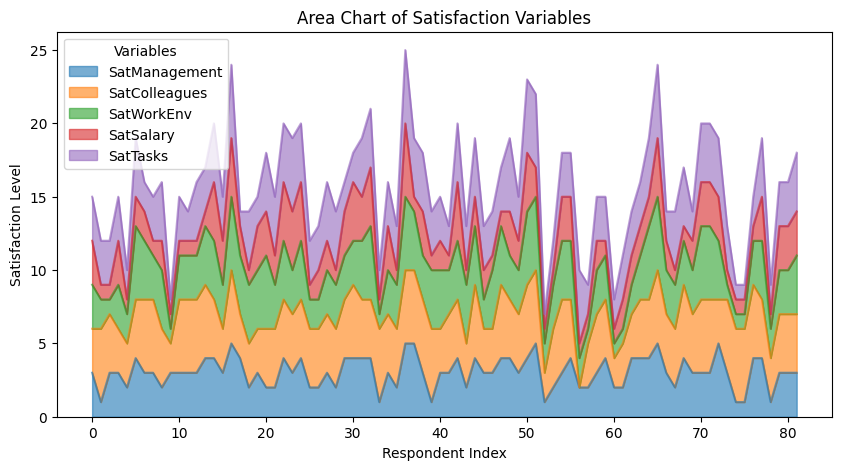

In [53]:
# Plot Area charts to compare multiple satisfaction variables
df[satisfaction_cols].reset_index(drop=True).plot(kind='area', alpha=0.6, figsize=(10, 5))
plt.title('Area Chart of Satisfaction Variables')
plt.xlabel('Respondent Index')
plt.ylabel('Satisfaction Level')
plt.legend(title='Variables')
plt.show()


### **Pie Chart** — Show Proportion of Salary Ranges

Pie charts show **how values are divided into groups**.  
Here, we categorize salary into ranges and visualize their proportions.


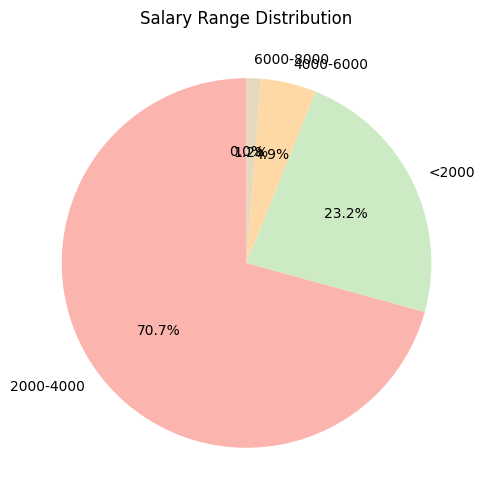

In [54]:
# Create salary categories
df['SalaryRange'] = pd.cut(df['Salary'], bins=[0, 2000, 4000, 6000, 8000, 10000],
                           labels=['<2000', '2000-4000', '4000-6000', '6000-8000', '8000+'])

# Plot pie chart
df['SalaryRange'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                      cmap='Pastel1', figsize=(6, 6))
plt.title('Salary Range Distribution')
plt.ylabel('')
plt.show()


### **Scatter Plots** — Explore Relationships Between Two Numerical Variables

Scatter plots show the **relationship** between two numerical variables.  
We’ll examine how **Age** relates to **Salary**, and how **Years of Service** affects **Satisfaction with Salary**.


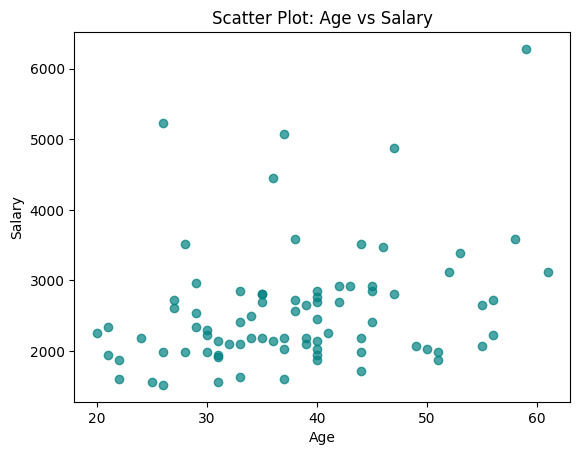

In [55]:
# Scatter plot: Age vs Salary
plt.scatter(df['Age'], df['Salary'], alpha=0.7, color='teal')
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

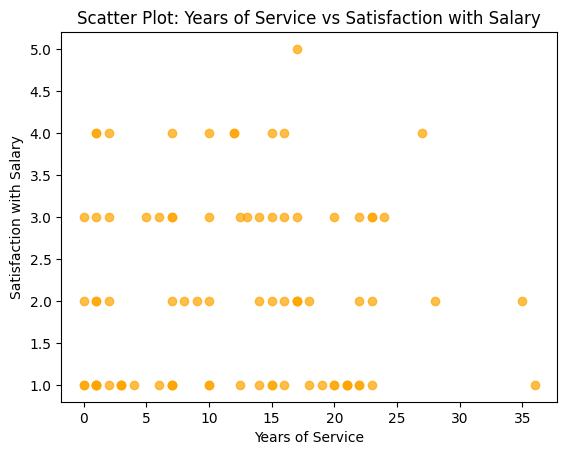

In [56]:
# Scatter plot: Years of Service vs Satisfaction with Salary
plt.scatter(df['YearsOfService'], df['SatSalary'], alpha=0.7, color='orange')
plt.title('Scatter Plot: Years of Service vs Satisfaction with Salary')
plt.xlabel('Years of Service')
plt.ylabel('Satisfaction with Salary')
plt.show()

## 4. Categorical Variable ###


### 4.1 Calculate Percentages for Education Dristibution

We used `pd.crosstab()` because it is the most efficient and straightforward tool in pandas to create a simple frequency table for a single categorical variable. This context is a style choice that prioritizes creating a clean, presentable, and extensible frequency table in a single, readable block of code.

We use crosstab to create a frequency table that shows:

1. How many people belong to each education category

2. What percentage of the total each category represents

3. `df2.columns.name = ''` Remove column name for cleaner presentation



In [57]:
# Create frequency table for education using crosstab
df2 = pd.crosstab(df['Education'], 'Count')

In [58]:
# Calculate percentage column manually 
df2['%'] = df2['Count'] / df2['Count'].sum()

**We created named index for rows and visualize distributions**

In [59]:
# Manually label education categories for clarity
df2.index = ['Primary school', 
             'Secondary school graduate', 
             'Bachelor level', 
             'Master level']

In [60]:
df2.columns.name = ''

In [61]:
# Display the final table
df2

,Count,%
Primary school,27,0.329268
Secondary school graduate,31,0.378049
Bachelor level,22,0.268293
Master level,2,0.024390


### 4.2 **Visualizing the Education Distribution with Percentages** ###
Create a horizontal bar chart to visualize the education distribution using percentages instead of raw counts, making it easy to compare the relative sizes of each education category.

1. `plot.barh(figsize=(10, 6))` specifies horizontal bars for better readability of category labels
2. `plt.xlabel('%, n = ' + str(df2['Count'].sum()))` Labels the x-axis to show percentages and Includes total sample size (n) for context by summing the 'Count' column
3. Ensure the chart displays properly within the figure boundaries
4.  Showed number of observations in both table and graph

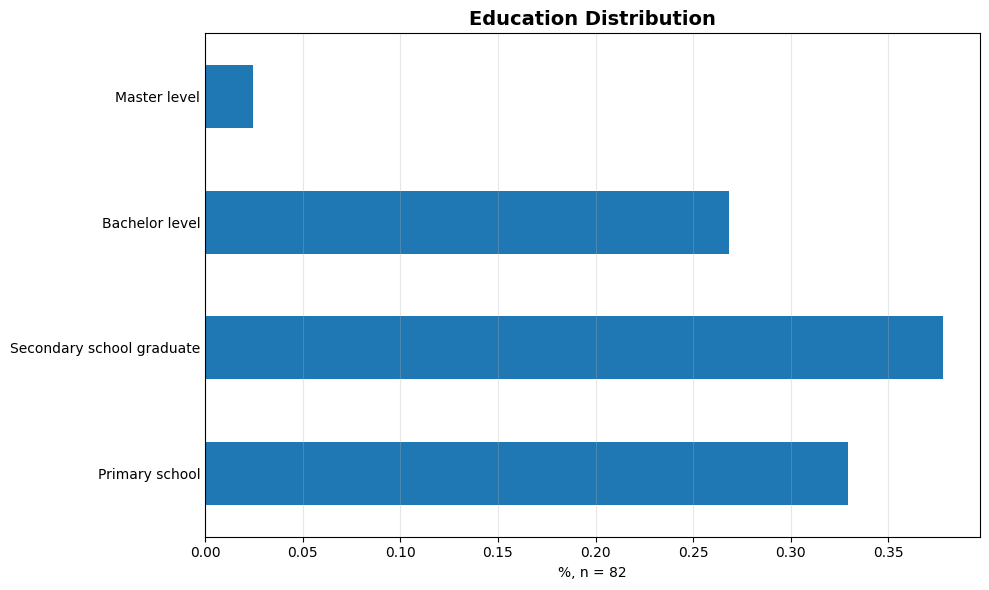

In [62]:
# Create and display education distribution bar chart
# Showed number of observations in both table and graph

df2['%'].plot.barh(figsize=(10, 6))
plt.title("Education Distribution", fontsize=14, fontweight='bold')
plt.xlabel('%, n = ' + str(df2['Count'].sum()))
plt.grid(axis='x', alpha=0.3)
plt.tick_params(axis='y', length=0)
plt.tight_layout()
plt.show()

## 5. **Numerical Variable - Salary Analysis** ##



-Begining the analysis by selecting a numerical variable from the dataset

-For this case, we use "salary" - the monthly salary in euros

-This variable represents continuous numerical data suitable for binning and distribution analysis

### 5.1 Check Minimum and Maximum Values

we used the `describe()` function to get comprehensive statistics for the salary variable

In [63]:

min(df["Salary"])

1521

In [64]:
max(df["Salary"])

6278

### 5.2 Define Bins for Classification      

- Create custom bins/ranges to categorize the continuous salary data

- Bins are defined as: `[1500, 2000, 2500, 3000, 4000, 7000]`

- Bins don't have evenly spaced

In [65]:
bins = [1500, 2000, 2500, 3000, 4000, 7000]

### 5.3 Classify Original Values into New Categorical Variable

- Create a new column `salary_class` in the dataframe
- Used `pd.cut()` function to categorize each salary value into the predefined bins.
- Continuous data becomes categorical groups and Easier to create histograms and charts

In [66]:
# Classify original values into a new categorical variable
df['Salary_class'] = pd.cut(df['Salary'], bins=bins)

In [67]:
df

,Gender,Age,FamilyStatus,Education,YearsOfService,Salary,SatManagement,SatColleagues,SatWorkEnv,SatSalary,SatTasks,HealthCare,HolidayCabin,Gym,MuscleCare,ServiceGroup,SalaryRange,Salary_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,0.0,0.0,0.0,0.0,21+,2000-4000,"(3000, 4000]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,0.0,0.0,0.0,0.0,6-10,2000-4000,"(2500, 3000]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,0.0,0.0,0.0,6-10,<2000,"(1500, 2000]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,0.0,0.0,0.0,11-15,2000-4000,"(2000, 2500]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,0.0,0.0,0.0,0-5,2000-4000,"(2000, 2500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,0.0,1.0,1.0,0.0,NaN,<2000,"(1500, 2000]"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,0.0,0.0,0.0,0-5,<2000,"(1500, 2000]"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,0.0,1.0,0.0,6-10,2000-4000,"(2500, 3000]"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,0.0,0.0,0.0,0.0,16-20,2000-4000,"(2500, 3000]"


In [68]:
df3 = pd.crosstab(df['Salary_class'], 'Count')

df3.index = df3.index.astype(str)

df3.columns.name = ''

# Calculate and make percentages
total_count = df3['Count'].sum()
n = df3['Count'].sum()
df3['%'] = (df3['Count'] / total_count * 100).round(1)




In [69]:
df3


,Count,%
Salary_class,,
"(1500, 2000]",19,23.2
"(2000, 2500]",28,34.1
"(2500, 3000]",22,26.8
"(3000, 4000]",8,9.8
"(4000, 7000]",5,6.1


The total row validates data integrity and shows overall scale, while percentages reveal relative significance and distribution patterns. Together, they create a comprehensive summary that supports strategic decision.
- `.loc['Total']` this maKes a new row with the label 'Total' at the bottom of the dataframe
- `.sum()` - Calculates the sum of all numerical values in each column

In [70]:
# Total row at the bottom
df3.loc['Total'] = df3.sum()

total_count = df3.loc['Total', 'Count']

#percentage
df3['%'] = (df3['Count'] / total_count * 100).round(1)

In [71]:
df3

,Count,%
Salary_class,,
"(1500, 2000]",19.0,23.2
"(2000, 2500]",28.0,34.1
"(2500, 3000]",22.0,26.8
"(3000, 4000]",8.0,9.8
"(4000, 7000]",5.0,6.1
Total,82.0,100.0


In [72]:
#checking the data type 
type(df3.index.values[0])

str

### 5.4 Finalizing the Layout

- `{'Count': '{:.0f}'` - Formats 'Count' column with 0 decimal places (whole numbers)

- `'%': '{:.1f}%'` - Formats '%' column with 1 decimal place and adds percentage symbol

In [73]:
df3.style.format({'Count': '{:.0f}', '%': '{:.1f}%'})

,Count,%
Salary_class,,
"(1500, 2000]",19,23.2%
"(2000, 2500]",28,34.1%
"(2500, 3000]",22,26.8%
"(3000, 4000]",8,9.8%
"(4000, 7000]",5,6.1%
Total,82,100.0%


### 5.5 Visualize with Histogram

- Created a histogram visualization using the binned data
- >X-axis: Salary ranges (bins) , Y-axis: Frequency count of employees in each bracket
- The histogram shows the visual representation of salary distribution across the organization
- We used `.hist()` to analyze the distribution of continuous numerical data (salaries) across predefined ranges(bins).

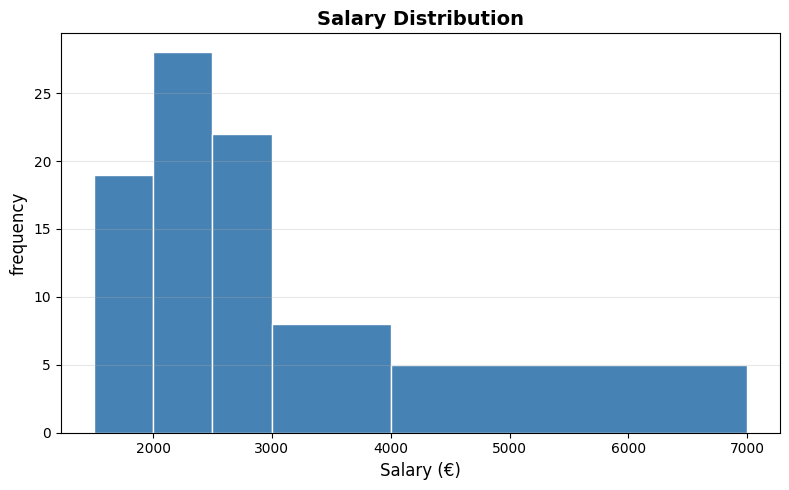

In [74]:
# Visualize with a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Salary'], bins=bins, edgecolor='white', alpha=1, color='steelblue')
plt.title('Salary Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Salary (€)', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Histogram with Percentage Values

Created a histogram where the Y-axis shows the percentage of employees in each salary bracket, making it easy to compare relative proportions across different salary ranges.

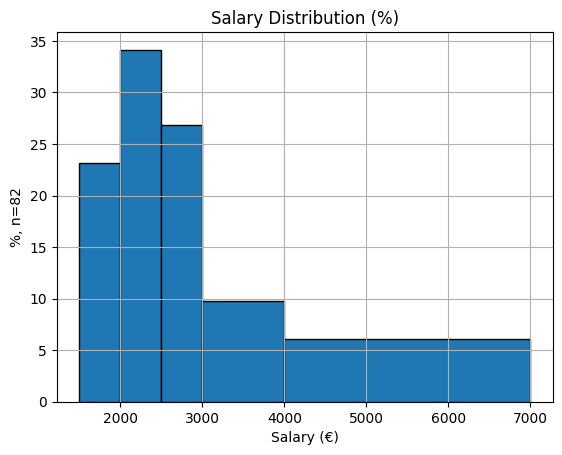

In [75]:
df['Salary'].hist(bins=bins, weights=np.ones(n) / n * 100,edgecolor='black', alpha=1)

plt.xlabel('Salary (€)')
plt.ylabel('%, n=' + str(n))
plt.title('Salary Distribution (%)')
plt.show()

## 6. Relationship Between Education and Gender

Lastly, we explore whether there is a relationship between **education level** and **gender** among employees.  
We will:
1. Create a crosstab showing **percentages of education levels** by gender.  
2. Visualize the results using a **horizontal bar chart**.  
3. Compute the **Chi-square test of independence** to statistically test the relationship.  




In [76]:
#Create a cross-tabulation between Education and Gender (percentages)
df4 = pd.crosstab(df['Education'], df['Gender'], normalize='columns') * 100

In [77]:
#Example mapping 
edu_labels = {
    1: 'Primary school',
    2: 'Secondary school graduate',
    3: 'Bachelor Level',
    4: 'Master Level'    
}


In [78]:
# Recreate the crosstab safely
df4 = pd.crosstab(df['Education'], df['Gender'], normalize='columns') * 100


In [79]:
# Rename index values that exist in the data
df4.rename(index=edu_labels, inplace=True)

In [80]:
# Rename gender columns (assuming 1 = woman, 2 = man)
df4.columns = ['woman', 'man']


In [81]:
display(df4)

,woman,man
Education,,
Primary school,34.920635,26.315789
Secondary school graduate,38.095238,36.842105
Bachelor Level,23.809524,36.842105
Master Level,3.174603,0.000000


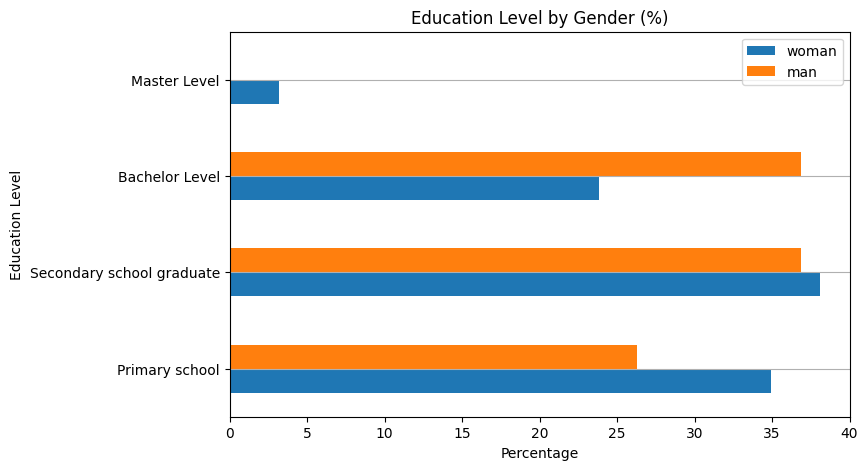

In [82]:
#Visualize with horizontal bar chart
df4.plot.barh(legend=True, figsize=(8,5))
plt.title('Education Level by Gender (%)')
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.grid(axis='y')
plt.show()

### 6.1 Performing a Chi-square Test of Independence: Gender and Education

In this step, we test whether there is a **statistical relationship** between employees’ **Gender** and their **Education level**.

- The **null hypothesis (H₀)** states that Gender and Education are **independent** — meaning the distribution of education levels is the same for both men and women.  
- The **alternative hypothesis (H₁)** states that there is an **association** between Gender and Education — meaning education levels differ between men and women.

By performing the **Chi-square Test of Independence**, we can check if the differences observed in the crosstab (Education × Gender) are likely due to chance or reflect a genuine pattern in the data.  

If the **p-value < 0.05**, it indicates a statistically significant relationship — suggesting that **education level varies by gender** among employees.  
If the **p-value ≥ 0.05**, it means there is **no strong evidence** of a relationship, implying that education levels are fairly similar across genders in this dataset.


In [83]:
#Create raw count crosstab for Chi-square test
df5 = pd.crosstab(df['Education'], df['Gender'])

In [84]:
print(" Raw Count Crosstab (for Chi-square Test):")
display(df5)

 Raw Count Crosstab (for Chi-square Test):


Gender,1,2
Education,,
1.0,22,5
2.0,24,7
3.0,15,7
4.0,2,0


In [85]:
#Perform Chi-square test 
from scipy.stats import chi2_contingency


chi2_contingency(df5)

Chi2ContingencyResult(statistic=np.float64(1.861625571114347), pvalue=np.float64(0.6016172019278934), dof=3, expected_freq=array([[20.74390244,  6.25609756],
       [23.81707317,  7.18292683],
       [16.90243902,  5.09756098],
       [ 1.53658537,  0.46341463]]))

## Interpretation & Observation: 

The p-value (approximately 0.602) is greater than 0.05, which means there is no strong evidence of a relationship between gender
and education level in this dataset. This implies that the observed differences in education levels between men and
women are not statistically significant and could be due to random chance.​

​